
#Importing Necessary Libraries




In [ ]:
!pip install -q -U google-generativeai

In [7]:
import google.generativeai as genai
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

GOOGLE_API_KEY="Add GEMINI API Key"  #API key is removed and should be replaced
os.environ["GEMINI_API_KEY"] = GOOGLE_API_KEY
genai.configure(api_key=GOOGLE_API_KEY)
model = genai.GenerativeModel('gemini-pro')
review_df = pd.read_csv("places.csv")
reviews = review_df["latest_reviews"]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#1.0 Data Visualization and Data Set Analysis

**1.1 Visualizing values within features**

In [ ]:
df = pd.read_csv('places.csv') # places.csv is the give Places Dataset

In [ ]:
# viewing null percentage of features
null_percentage = df.isnull().mean() * 100
print(null_percentage)

name                   0.000000
lat                    0.243309
lng                    0.243309
formatted_address      0.000000
rating                13.625304
user_ratings_total    13.625304
latest_reviews         0.000000
dtype: float64


**1.2 Visualizing Historograms of numerical features**

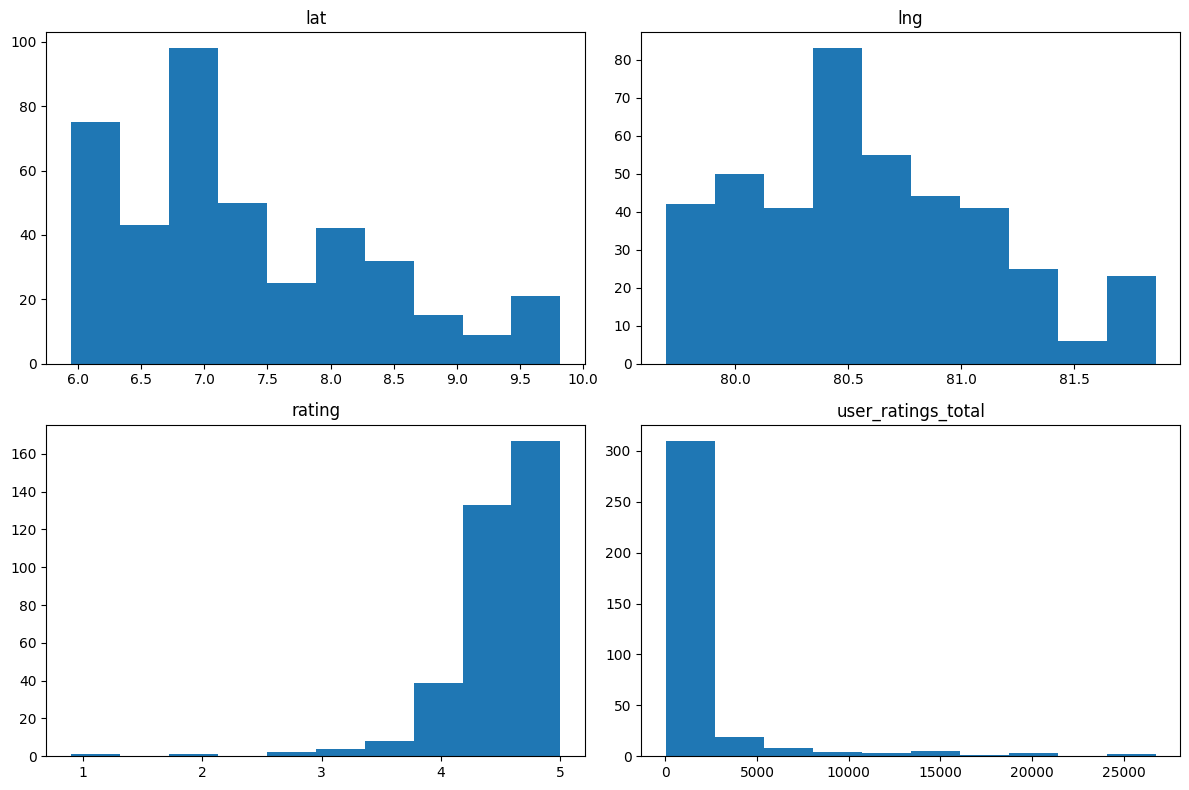

In [ ]:
# Historgrams of numerical features
df.hist(figsize=(12, 8), bins=10, grid=False)
plt.tight_layout()
plt.show()

**1.3 Visualizing statistics of location experiences**
(*added_data.csv* dataset used for extracting location experice classes is defined in a latter part of the notebook)



In [ ]:
#catagorizing places according to the experience to get an idea about experiences given from the locations
extra_df = pd.read_csv("added_data.csv")
exp_types = extra_df["Location_Type"].unique().tolist()
print(exp_types)

['Religious Sites', 'Farms', 'Museums', 'Beaches', 'Waterfalls', 'Gardens', 'National Parks', 'Historic Sites', 'Bodies of Water', 'Nature & Wildlife Areas', 'Zoological Gardens']


extracting location experiences from reviews usin GenAI

In [ ]:
import time
reviews = df["latest_reviews"]
place_type = []

for x in range(len(reviews)):
    review = reviews[x]
    success = False  # Flag to track if the iteration was successful

    t = 0

    while not success:
        try:
            # Request content from the model
            response = model.generate_content(f"Based on these {review} set of reviews. give me only 1 most suitable location type of this place out of this list {exp_types}")
            place_type.append(response.text)
            print(f"Completed index: {x}")
            success = True  # Mark as successful to exit the while loop
        except Exception as e:
            if t>=60 :
              place_type.append(None)
              success = True
              print(f"Index skipped: {x}")
            t+=10
            # Handle specific exception when token limit is exceeded
            print(f"Error at index {x}: {str(e)}")
            print(f"Token limit exceeded or other error, sleeping for {t} seconds...")
            time.sleep(t)
            continue

Completed index: 0
Completed index: 1
Completed index: 2
Completed index: 3
Completed index: 4
Completed index: 5
Completed index: 6
Completed index: 7
Completed index: 8
Completed index: 9
Completed index: 10
Completed index: 11
Completed index: 12
Completed index: 13
Completed index: 14


Error at index 15: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...
Completed index: 15
Completed index: 16
Completed index: 17


Error at index 18: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...


Error at index 18: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...
Completed index: 18
Completed index: 19
Completed index: 20
Completed index: 21
Completed index: 22
Completed index: 23
Completed index: 24
Completed index: 25
Completed index: 26
Completed index: 27
Completed index: 28
Completed index: 29
Completed index: 30
Completed index: 31
Completed index: 32
Completed index: 33
Completed index: 34
Completed index: 35


Error at index 36: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...


Error at index 36: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...
Completed index: 36
Completed index: 37
Completed index: 38
Completed index: 39
Completed index: 40
Completed index: 41
Completed index: 42
Completed index: 43
Completed index: 44
Completed index: 45
Completed index: 46
Completed index: 47
Completed index: 48
Completed index: 49
Completed index: 50


Error at index 51: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...
Completed index: 51
Completed index: 52
Completed index: 53
Completed index: 54


Error at index 55: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...
Completed index: 55
Completed index: 56
Completed index: 57
Completed index: 58
Completed index: 59
Completed index: 60
Completed index: 61
Completed index: 62
Completed index: 63
Completed index: 64
Completed index: 65
Completed index: 66
Completed index: 67
Completed index: 68
Completed index: 69
Completed index: 70


Error at index 71: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...
Completed index: 71


Error at index 72: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...


Error at index 72: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...
Completed index: 72
Completed index: 73
Completed index: 74
Completed index: 75
Completed index: 76
Completed index: 77
Completed index: 78
Completed index: 79
Completed index: 80
Completed index: 81
Completed index: 82
Completed index: 83
Completed index: 84
Completed index: 85
Completed index: 86


Error at index 87: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...


Error at index 87: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...
Completed index: 87
Completed index: 88
Completed index: 89
Completed index: 90
Completed index: 91
Completed index: 92
Completed index: 93
Completed index: 94
Completed index: 95
Completed index: 96
Completed index: 97
Completed index: 98
Completed index: 99
Completed index: 100
Completed index: 101
Completed index: 102
Completed index: 103


Error at index 104: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...
Completed index: 104


Error at index 105: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...


Error at index 105: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...
Completed index: 105
Completed index: 106
Completed index: 107
Completed index: 108
Completed index: 109
Completed index: 110
Completed index: 111
Completed index: 112
Completed index: 113
Completed index: 114
Completed index: 115
Completed index: 116
Completed index: 117
Completed index: 118
Completed index: 119
Completed index: 120
Completed index: 121
Completed index: 122
Completed index: 123


Error at index 124: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...


Error at index 124: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...
Completed index: 124
Completed index: 125
Completed index: 126
Completed index: 127
Completed index: 128


ERROR:tornado.access:500 POST /v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 1017.27ms


Error at index 129: 500 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: An internal error has occurred. Please retry or report in https://developers.generativeai.google/guide/troubleshooting
Token limit exceeded or other error, sleeping for 10 seconds...
Completed index: 129
Completed index: 130
Completed index: 131
Completed index: 132
Completed index: 133
Completed index: 134
Completed index: 135
Completed index: 136
Completed index: 137


Error at index 138: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...
Completed index: 138


Error at index 139: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...
Completed index: 139
Completed index: 140
Completed index: 141
Completed index: 142
Completed index: 143
Completed index: 144
Completed index: 145
Completed index: 146
Completed index: 147
Completed index: 148
Completed index: 149
Completed index: 150
Completed index: 151
Completed index: 152


Error at index 153: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...
Completed index: 153
Completed index: 154


Error at index 155: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...


Error at index 155: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...
Completed index: 155
Completed index: 156
Completed index: 157
Completed index: 158
Completed index: 159
Completed index: 160
Completed index: 161
Completed index: 162
Completed index: 163
Completed index: 164
Completed index: 165
Completed index: 166
Completed index: 167
Completed index: 168
Completed index: 169


Error at index 170: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...
Completed index: 170
Completed index: 171
Completed index: 172
Completed index: 173
Completed index: 174
Completed index: 175
Completed index: 176
Completed index: 177
Completed index: 178


ERROR:tornado.access:503 POST /v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 610.24ms


Completed index: 179
Completed index: 180
Completed index: 181
Completed index: 182
Completed index: 183
Completed index: 184
Completed index: 185
Completed index: 186
Completed index: 187


Error at index 188: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...
Completed index: 188


Error at index 189: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...


Error at index 189: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...
Completed index: 189
Completed index: 190
Completed index: 191
Completed index: 192
Completed index: 193
Completed index: 194
Completed index: 195
Completed index: 196
Completed index: 197
Completed index: 198
Completed index: 199
Completed index: 200
Completed index: 201
Completed index: 202
Completed index: 203
Completed index: 204
Completed index: 205
Completed index: 206


Error at index 207: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...
Completed index: 207
Completed index: 208
Completed index: 209
Completed index: 210
Completed index: 211
Completed index: 212
Completed index: 213
Completed index: 214
Completed index: 215
Completed index: 216
Completed index: 217
Completed index: 218
Completed index: 219
Completed index: 220
Completed index: 221
Completed index: 222
Completed index: 223
Completed index: 224


Error at index 225: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...


Error at index 225: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...
Completed index: 225
Completed index: 226
Completed index: 227
Completed index: 228
Completed index: 229
Completed index: 230
Completed index: 231
Completed index: 232
Completed index: 233
Completed index: 234
Completed index: 235
Completed index: 236
Completed index: 237
Completed index: 238
Completed index: 239
Completed index: 240
Completed index: 241


ERROR:tornado.access:503 POST /v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 609.61ms


Completed index: 242
Completed index: 243


Error at index 244: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...


Error at index 244: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...
Completed index: 244
Completed index: 245
Completed index: 246
Completed index: 247
Completed index: 248
Completed index: 249
Completed index: 250
Completed index: 251
Completed index: 252
Completed index: 253
Completed index: 254
Completed index: 255
Completed index: 256
Completed index: 257
Completed index: 258
Completed index: 259


Error at index 260: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...


Error at index 260: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...
Completed index: 260
Completed index: 261
Completed index: 262
Completed index: 263
Completed index: 264
Completed index: 265
Completed index: 266
Completed index: 267
Completed index: 268
Completed index: 269
Completed index: 270
Completed index: 271
Completed index: 272
Completed index: 273
Completed index: 274
Completed index: 275


Error at index 276: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...


Error at index 276: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...
Completed index: 276
Completed index: 277
Completed index: 278
Completed index: 279
Completed index: 280
Completed index: 281
Completed index: 282
Completed index: 283
Completed index: 284
Completed index: 285
Completed index: 286
Completed index: 287
Completed index: 288
Completed index: 289
Completed index: 290
Completed index: 291


Error at index 292: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...
Completed index: 292


Error at index 293: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...
Completed index: 293


Error at index 294: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...
Completed index: 294
Completed index: 295
Completed index: 296
Completed index: 297
Completed index: 298
Completed index: 299
Completed index: 300
Completed index: 301
Completed index: 302
Completed index: 303
Completed index: 304
Completed index: 305
Completed index: 306
Completed index: 307
Completed index: 308
Completed index: 309


Error at index 310: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...


Error at index 310: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...


ERROR:tornado.access:503 POST /v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 663.10ms


Completed index: 310
Completed index: 311
Completed index: 312
Completed index: 313
Completed index: 314
Completed index: 315
Completed index: 316
Completed index: 317
Completed index: 318


ERROR:tornado.access:503 POST /v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 609.87ms


Completed index: 319
Completed index: 320
Completed index: 321
Completed index: 322
Completed index: 323
Completed index: 324
Completed index: 325
Completed index: 326


Error at index 327: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...


ERROR:tornado.access:503 POST /v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 661.09ms


Completed index: 327


Error at index 328: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...
Completed index: 328


Error at index 329: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...
Completed index: 329
Completed index: 330
Completed index: 331
Completed index: 332
Completed index: 333


ERROR:tornado.access:503 POST /v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 635.90ms


Completed index: 334
Completed index: 335
Completed index: 336
Completed index: 337
Completed index: 338
Completed index: 339
Completed index: 340
Completed index: 341
Completed index: 342
Completed index: 343


Error at index 344: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...
Completed index: 344
Completed index: 345
Completed index: 346


Error at index 347: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...
Completed index: 347
Completed index: 348
Completed index: 349
Completed index: 350
Completed index: 351
Completed index: 352
Completed index: 353
Completed index: 354
Completed index: 355
Completed index: 356
Completed index: 357
Completed index: 358
Completed index: 359
Completed index: 360
Completed index: 361
Completed index: 362
Completed index: 363


Error at index 364: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...
Completed index: 364


Error at index 365: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...


Error at index 365: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...
Completed index: 365
Completed index: 366
Completed index: 367
Completed index: 368
Completed index: 369
Completed index: 370
Completed index: 371
Completed index: 372
Completed index: 373
Completed index: 374
Completed index: 375
Completed index: 376
Completed index: 377
Completed index: 378


Error at index 379: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...


Error at index 379: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...
Completed index: 379
Completed index: 380
Completed index: 381
Completed index: 382
Completed index: 383
Completed index: 384
Completed index: 385
Completed index: 386
Completed index: 387
Completed index: 388
Completed index: 389
Completed index: 390
Completed index: 391
Completed index: 392
Completed index: 393
Completed index: 394


Error at index 395: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...
Completed index: 395
Completed index: 396


Error at index 397: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: Resource has been exhausted (e.g. check quota).
Token limit exceeded or other error, sleeping for 10 seconds...
Completed index: 397
Completed index: 398
Completed index: 399
Completed index: 400
Completed index: 401
Completed index: 402
Completed index: 403
Completed index: 404
Completed index: 405
Completed index: 406
Completed index: 407
Completed index: 408
Completed index: 409
Completed index: 410


In [ ]:
df['Location_type'] = place_type
df.to_csv('locationType.csv')

In [5]:
df = pd.read_csv('locationType.csv')

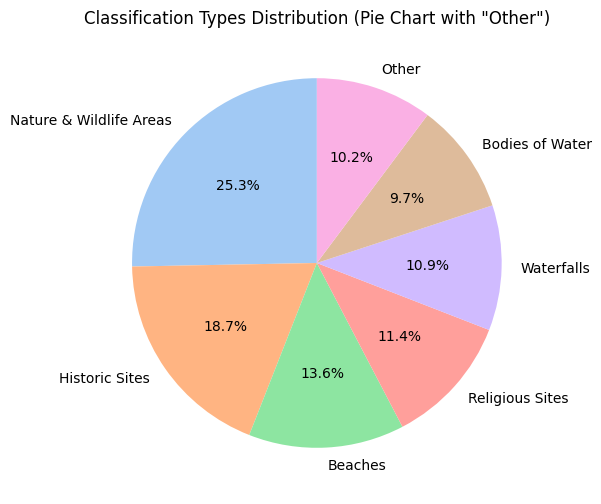

In [ ]:
df = pd.read_csv('locationType.csv')

class_counts = df['Location_type'].value_counts()

# Calculate the total number of classifications
total_count = class_counts.sum()

# Set the threshold for "Other" (5% of total)
threshold = 0.05 * total_count

# Separate types that are below the threshold into "Other"
class_counts['Other'] = class_counts[class_counts < threshold].sum()

# Keep only types that are above the threshold
class_counts = class_counts[class_counts >= threshold]

# --- Plotting the Pie Chart ---
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Classification Types Distribution (Pie Chart with "Other")')
plt.show()

             Location_type  average_rating  count
0                  Beaches        4.397727     56
1          Bodies of Water        4.407407     40
2                  Gardens        4.511111      9
3           Historic Sites        4.570423     77
4                  Museums        4.385000     20
5           National Parks        4.420000      6
6  Nature & Wildlife Areas        4.356180    104
7          Religious Sites        4.647727     47
8               Waterfalls        4.387500     45
9       Zoological Gardens        4.600000      3


<ipython-input-57-9c886808cd02>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Location_type', y='count', data=stats, palette='Blues_d', ax=ax1)


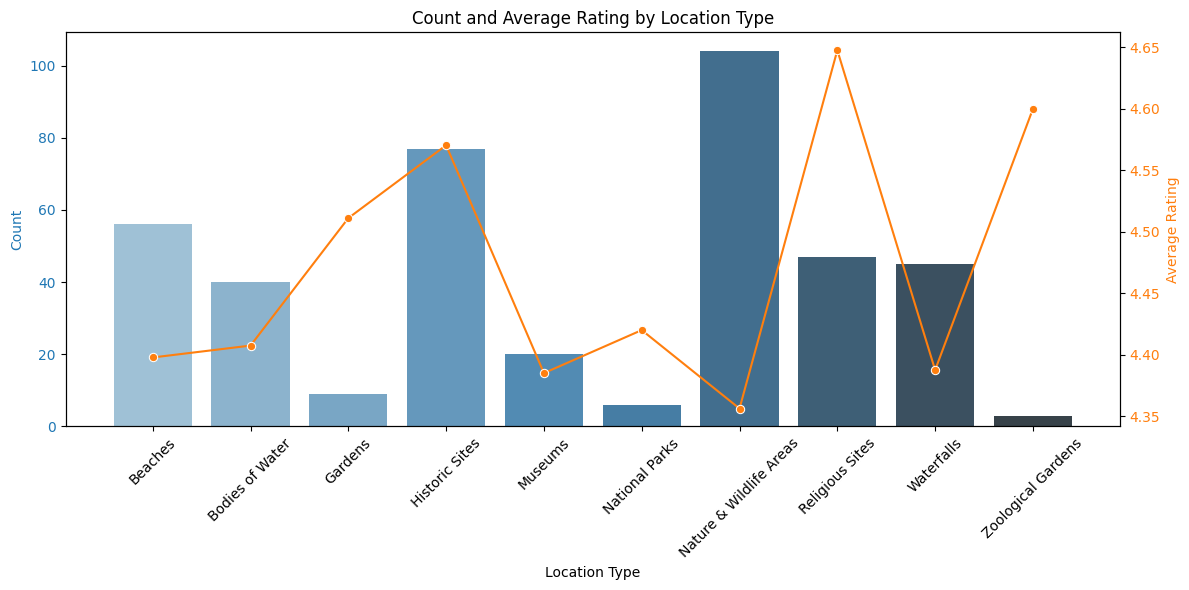

In [ ]:
#ploting location types and there ratings in the same plot
filtered_df = df[df['Location_type'].isin(exp_types)]

stats = filtered_df.groupby('Location_type').agg(
    average_rating=('rating', 'mean'),
    count=('rating', 'size')
).reset_index()

print(stats)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for count
color = 'tab:blue'
ax1.set_xlabel('Location Type')
ax1.set_ylabel('Count', color=color)
sns.barplot(x='Location_type', y='count', data=stats, palette='Blues_d', ax=ax1)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Line plot for average rating
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Average Rating', color=color)
sns.lineplot(x='Location_type', y='average_rating', data=stats, marker='o', color=color, ax=ax2)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Count and Average Rating by Location Type')
fig.tight_layout()

plt.show()

**1.4 Visualizing location points in the country map**

In [6]:
# center of the map
loc_center = [df['lat'].mean(), df['lng'].mean()]

# base map
map = folium.Map(location=loc_center, tiles='Openstreetmap', zoom_start=5, control_scale=True)

# Function to create markers with appropriate colors
def create_marker(loc_data):
    location_type = loc_data['Location_type']
    color_dict = {
        'Beaches': 'blue',
        'Nature & Wildlife Areas': 'green',
        'Historic Sites': 'yellow',
        'Other': 'red'
    }
    color = color_dict.get(location_type, 'red')
    return folium.CircleMarker(location=[loc_data['lat'], loc_data['lng']],
                            radius = 2,
                            popup=loc_data['name'],
                            fill=True,
                            fill_color=color,
                            color = color,
                            fill_opacity=0.7)


# Iterate through DataFrame and add markers
for index, row in df.iterrows():
    marker = create_marker(row.to_dict())
    marker.add_to(map)


folium.LayerControl().add_to(map)
map

#2.0 Data Preprocessing

**2.1 Use GenAI to extract the location name out of Reviews to impute the unclear location names**

In [ ]:
import time

places = []

for x in range(len(reviews)):
    review = reviews[x]
    success = False  # Flag to track if the iteration was successful
    t = 0
    while not success:
        try:
            # Request content from the model
            response = model.generate_content("Give me only the specific place that this review is referring to " + review)
            places.append(response.text)
            print(f"Completed index: {x}")
            success = True

        except Exception as e:
            #if await time is increased to 60s add None to the name and skip
            if t>=60 :
              places.append(None)
              success = True
              print(f"Index skipped: {x}")
            t+=10
            # Handle specific exception when token limit is exceeded
            print(f"Error at index {x}: {str(e)}")
            print(f"Token limit exceeded or other error, sleeping for {t} seconds...")
            time.sleep(t)  # Pause execution for 10 seconds
            continue

Completed index: 0
Completed index: 1
Completed index: 2
Completed index: 3
Completed index: 4
Completed index: 5
Completed index: 6


KeyboardInterrupt: 

**2.2 Removing Redundant Places**

Importing Libraries

In [ ]:
df = pd.read_csv("updated_reviewed_places.csv")

Finding Repeated terms and excluding common english terms as much as possible

In [ ]:
stop_words = set(stopwords.words('english'))

#Convert all names to lowercase
df['filtered_place'] = df['filtered_place'].str.lower()

#Tokenize the place names (split them into individual words)
words = df['filtered_place'].str.split()

#Flatten the list of words and count frequencies
word_list = [word for sublist in words for word in sublist]  # Flatten list of lists
filtered_word_list = [word for word in word_list if word not in stop_words]

filtered_word_counts = Counter(filtered_word_list)

#Find repeated words without stopwords
repeated_filtered_words = {word: count for word, count in filtered_word_counts.items() if count > 1}

#Display repeated words without stopwords
print("Repeated words without stopwords:")
for word, count in repeated_filtered_words.items():
    print(f"'{word}' appears {count} times")

Repeated words without stopwords:
'bay' appears 2 times
'beach' appears 42 times
'mirissa' appears 3 times
'weligama' appears 2 times
'hikkaduwa' appears 2 times
'sri' appears 10 times
'lanka' appears 7 times
'unawatuna' appears 3 times
'island' appears 2 times
'galle' appears 8 times
'dutch' appears 9 times
'fort' appears 11 times
'polonnaruwa' appears 3 times
'ancient' appears 3 times
'city' appears 3 times
'yala' appears 2 times
'national' appears 23 times
'park' appears 22 times
'sinharaja' appears 2 times
'forest' appears 6 times
'reserve' appears 5 times
'plains' appears 2 times
'bundala' appears 2 times
'dalada' appears 2 times
'temple' appears 15 times
'dambulla' appears 3 times
'royal' appears 7 times
'cave' appears 4 times
'anuradhapura' appears 2 times
'mihintale' appears 2 times
'buddhist' appears 4 times
'monastery' appears 3 times
'ella' appears 20 times
'rock' appears 5 times
'knuckles' appears 2 times
'ventura' appears 2 times
'jungle' appears 2 times
'uppuveli' appears

Analyzing each repeated term included names for possible repeated locations

In [ ]:
redundant_terms_in_places = [
    'mirissa', 'weligama', 'hikkaduwa', 'unawatuna', 'galle', 'dutch', 'fort',
    'polonnaruwa', 'yala', 'sinharaja', 'bundala', 'dambulla', 'anuradhapura',
    'mihintale', 'ella', 'knuckles', 'ventura', 'uppuveli', 'koggala',
    'marakolliya', 'colombo', 'kandy', 'trincomalee', 'pitawala', 'jaffna',
    'nuwara', 'eliya', 'golf', 'club', 'cinnamon', 'bentota', 'ganga', 'lake',
    'kalpitiya', 'bridge', 'ritigala', 'caves', 'peradeniya', 'hambantota',
    'kataragama', 'ambuluwawa', 'diyaluma', 'pinnawala', 'rekawa', 'victor',
    'hasselblad', 'turtle', 'kanneliya', 'narangala', 'batticaloa', 'kallady',
    'kotte', 'lotus', 'matara', 'mahamevnawa', "mary's", 'ridiyagama', 'mannar',
    'okanda', 'ranmasu', 'neithal', 'meegaskada'
]

df = pd.read_csv("ver0.1.csv")

for term in redundant_terms_in_places:
    # Filter rows where the 'name' column contains the term (case-insensitive)
    term_matches = df[df['name'].str.contains(term, case=False, na=False)]

    # Find data points where 'rating' column is null
    null_ratings = term_matches[term_matches['rating'].isnull()]

    # Print the results
    if not term_matches.empty:
        print(f"\nData points with the term '{term}':")
        print(term_matches[['name', 'rating']])

        if not null_ratings.empty:
            print(f"\nData points with null rating for the term '{term}':")
            print(null_ratings[['name', 'rating']])


Data points with the term 'mirissa':
                        name  rating
1              Mirissa Beach     4.6
46                   Mirissa     NaN
185  Mirissa whale Explorers     3.8

Data points with null rating for the term 'mirissa':
       name  rating
46  Mirissa     NaN

Data points with the term 'weligama':
                                       name  rating
2            Weligama Beach (surf and stay)     4.4
250  Snake Farm Weligama (Traditional Farm)     5.0

Data points with the term 'hikkaduwa':
               name  rating
4   Hikkaduwa Beach     4.7
76        Hikkaduwa     NaN

Data points with null rating for the term 'hikkaduwa':
         name  rating
76  Hikkaduwa     NaN

Data points with the term 'unawatuna':
                name  rating
6    Unawatuna Beach     4.8
101        Unawatuna     NaN
410  Unawatuna Beach     4.3

Data points with null rating for the term 'unawatuna':
          name  rating
101  Unawatuna     NaN

Data points with the term 'galle':
       

Separating the locations with no reviews for separate preprocessing

In [ ]:
#separating the null rated data points - negative reviewed
df_null_ratings = df[df['rating'].isnull()]
df_non_null = df.dropna(subset=['rating'])

Removing Redundant values of same location.

In [ ]:
#redundant_entries list taken from repeated term analysis
redundant_entries = [[6,410],[11,198],[16,343],[19,405],[22,395],[28,135],[31,402],[134,403],[81,393],[84,394],[104,398],[130,401],[255,363],[318,319]]
for index_pair in redundant_entries:
    idx1, idx2 = index_pair
    entry1 = df_non_null.loc[idx1]
    entry2 = df_non_null.loc[idx2]

    # Determine which entry has the higher user_ratings_total
    if entry1['user_ratings_total'] >= entry2['user_ratings_total']:
        keep_entry = entry1
        remove_entry = entry2
    else:
        keep_entry = entry2
        remove_entry = entry1

    # Calculate new rating and user_ratings_total
    new_user_ratings_total = keep_entry['user_ratings_total'] + remove_entry['user_ratings_total']
    new_rating = (keep_entry['rating'] * keep_entry['user_ratings_total'] + remove_entry['rating'] * remove_entry['user_ratings_total']) / new_user_ratings_total

    # Update the entry with new rating and user_ratings_total
    df_non_null.loc[df_non_null.index == keep_entry.name, 'rating'] = new_rating
    df_non_null.loc[df_non_null.index == keep_entry.name, 'user_ratings_total'] = new_user_ratings_total

    # Drop the redundant entry
    df_non_null = df_non_null.drop(index=remove_entry.name)

In [ ]:
#separating the null_ratings from original dataframe to be preprocessed separately

df_non_null.to_csv('ver0.2.csv', index=False)
df_null_ratings.to_csv('null_rating.csv', index=False)

Analyzing another collected dataset and aggragating its' reviews to get an idea on classifications of experience types.
(This dataset is used above to classify experiences)
>*The files associated with this dataset are licensed under a Creative Commons Attribution 4.0 International licence.
Sewwandi, Taniya (2023), “Tourism and Travel Reviews: Sri Lankan Destinations”, Mendeley Data, V1, doi: 10.17632/2nbvx5m4hs.1*

In [ ]:
new_reviews_df = pd.read_csv("new_datapoints.csv")
new_reviews_df.head()

,Location_Name,Located_City,Location,Location_Type,User_ID,User_Location,User_Locale,User_Contributions,Travel_Date,Published_Date,Rating,Helpful_Votes,Title,Text
0,Arugam Bay,Arugam Bay,"Arugam Bay, Eastern Province",Beaches,User 1,"Dunsborough, Australia",en_US,8,2019-07,2019-07-31T07:53:21-04:00,5,1,Best nail spa in Arugam bay on the water!,I had a manicure here and it really was profes...
1,Arugam Bay,Arugam Bay,"Arugam Bay, Eastern Province",Beaches,User 2,"Bendigo, Australia",en_US,4,2019-06,2019-07-21T21:50:11-04:00,4,0,Best for surfing,"Overall, it is a wonderful experience. We visi..."
2,Arugam Bay,Arugam Bay,"Arugam Bay, Eastern Province",Beaches,User 3,"Melbourne, Australia",en_US,13,2019-07,2019-07-15T18:52:55-04:00,5,0,We Love Arugam Bay,"Great place to chill, swim, surf, eat, shop, h..."
3,Arugam Bay,Arugam Bay,"Arugam Bay, Eastern Province",Beaches,User 4,"Ericeira, Portugal",en_US,4,2019-06,2019-07-03T10:32:41-04:00,5,0,Sun and waves.,Good place for surf and a few stores to going ...
4,Arugam Bay,Arugam Bay,"Arugam Bay, Eastern Province",Beaches,User 5,"Pistoia, Italy",en_US,14,2019-07,2019-07-02T17:07:02-04:00,5,0,"Great swimming, surfing, great fish aznd frien...",This place is great for surfing but even if yo...


In [ ]:
new_reviews_df['Published_Date'] = pd.to_datetime(new_reviews_df['Published_Date'])

# Defining feature handling when grouping
result = (
    new_reviews_df.groupby('Location_Name')
    .agg({
        'Located_City': 'first',
        'Location': 'first',
        'Location_Type': 'first',
        'Rating': 'mean'
    })
    .reset_index()
)

# Get the 5 most recent reviews
recent_texts = (
    new_reviews_df.sort_values(by='Published_Date', ascending=False)
    .groupby('Location_Name')
    .apply(lambda x: x.head(5)['Text'].tolist())
    .reset_index()
    .rename(columns={0: 'Recent_Texts'})
)

final_df = pd.merge(result, recent_texts, on='Location_Name')
final_df.head()

<ipython-input-43-590fea63d80c>:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  new_reviews_df['Published_Date'] = pd.to_datetime(new_reviews_df['Published_Date'])


,Location_Name,Located_City,Location,Location_Type,Rating,Recent_Texts
0,Abhayagiri Dagaba,Anuradhapura,"Anuradhapura, North Central Province",Religious Sites,4.302083,[Totally breathtaking. This huge stupa is an i...
1,Ambewela Farms,Nuwara Eliya,"Nuwara Eliya, Central Province",Farms,3.897059,[The trip to Amebewela farm was lovely with ve...
2,Ariyapala Mask Museum,Ambalangoda,"Ambalangoda, Galle District, Southern Province",Museums,3.870130,"[The museum was very nice, though small, and p..."
3,Arugam Bay,Arugam Bay,"Arugam Bay, Eastern Province",Beaches,4.058824,[Great bay some lovely restaurants and brillia...
4,Baker's Falls,Nuwara Eliya,Uva Province,Waterfalls,3.959459,[My partner and I visited the falls whilst tou...


In [ ]:
final_df.to_csv('added_data.csv', index=False) #creating add_data.csv

In [ ]:
new_reviews_df['Location_Name'].nunique()

76

Sentiment analyzing and rating imputation is in the sentiment analyzer notebooks

In [ ]:
#concatonating the separated dataframes after the sentiment score count and the rating imputation
df_1 = read_csv('reviewed.csv')
df_2 = read_csv('visitors_null_reviews.csv')
df_combined = pd.concat([df_1, df_2], ignore_index=True)
df_combined.to_csv('preProcessed_places.csv', index=False)